### K-Means Clustering 2
-----------

This material is based on the previous version of CS108L, see https://cs4all.cs.unm.edu/cs108.html
- Credit to Prof. Melanie Moses, Dr. Irene Lee, Dr. Maureen Psaila-Dombrowski, Prof. Dave Ackley and collaborators (see website)

-----------

The material on loan data is a modified version of this example
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
https://drive.google.com/file/d/1ZzEouo7lRJvajxK6jLM2K_p9xAwGw1tS/view?usp=sharing

### Learning Goals
- Continue learning the basics of the K-Means algorithm
- Learn how to apply the K-Means algorithm to larger library dataset on bank loans
- Practice using the "elbow" test to determine how many groups (or clusters) are needed
    - Use inertia plot

### Overview of K-Means Clustering

Consider the following
1. Say your are given N data points.  These can be points in the x-y plane
   
2. Next, you group these N data points into K groups (also called clusters)

3. Each data point will belong to one, and only one group (or cluster)

4. Each cluster will have a centroid (or center of gravity)

5. The goal is to make sure that each point is in the group that has the closest centroid (or center of gravity).  

### Import the K-Means and Pandas toolkits
- Luckily, we don't have to implement K-Means

In [1]:
%matplotlib inline

# K-Means toolkit
from sklearn.cluster import KMeans

# Data manipulation and analysis.
import pandas as pd


### We can visualize the results of K-Means with the following for a simple dataset

In [2]:
x = [4,  6,  7,  5,  4,  12, 15 , 5, 13, 11]
y = [22, 20, 21, 18, 15, 24, 26, 18, 24, 23]
data = []
for i in range(10):
    data.append( (x[i], y[i]) )


### Carry out the clustering algorithm using 2 clusters
- All the purple points are in cluster 1
- All the yellow points are in cluster 2

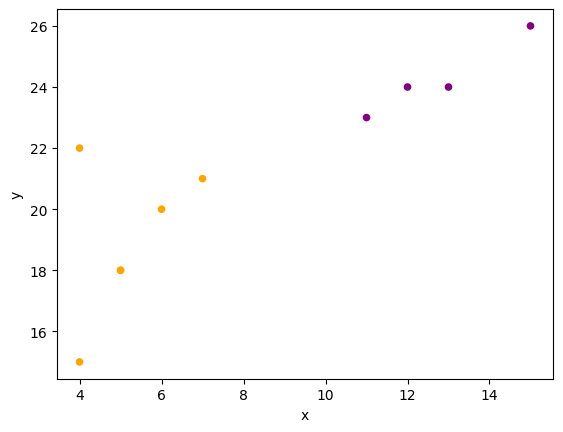

In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Create list of color for each point
colors = [ 'orange', 'purple']
c = [colors[k] for k in kmeans.labels_]

# Scatter plot the data clusters
df = pd.DataFrame({'x': x, 'y': y})
ax = df.plot.scatter(x='x', y='y', c=c)

### This seems simple enough!

### But, remember that this is an NP-hard problem to solve exactly
   - Just means very, very expensive -- basically too expensive

### Why? Consider this
- Say, you have lots of points and groups
- Then, you realize that one point in group 4 needs to move to group 5
    - This is because group 5 has a center of gravity closer to this point
- Now, you've modified the center of gravity for both group 4 and group 5!
    - Now, you have to check all the points in groups 4 and 5 to make sure they are all still in the right group!
    - And if any of them move to a different group, that will further change centers of gravity
- In other words, any change that you make to a point (moving it from one group to another group), could affect every other point!  


### But, we have the K-Means algorithm for reasonable approximate solutions
1. K-Means starts of with K random guesses for each of the K group centers
2. Then, all the points are assigned to the group center that they are closest to
3. Then, the group center is adjusted to better reflect the current center of gravity for each group.
    - Steps 2  and 3 are then repeated, until the user stops the process 
    
See the previous lab file for the equations governing the K-Means problem

### Inertia Review with K-Means

- Inertia is the sum of the distance between every point in a cluster and the center
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_inertia2.png" width="350">

- What do you think a good value for inertia is for a cluster?  Large or small?

- What happens if we go from 2 clusters to 3 clusters and inertia doesn't change much?



### We want small inertias
- A small inertia means that all the points are close to their group's center
- If going from K groups to K+1 groups doesn't change the inertia much, then we have enough groups.


### Consider this sample inertia plot.
- The plot tells us that 2 groups is likely enough

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_inertia1.png" width="450">



### Begin Material for Lab 2 on K-Means

### Download a library data file on bank loan information for hypothetical customers
    

In [4]:
# House cleaning part 1
# IMPORT CLUSTERING 2
from urllib.request import urlretrieve
(file, message) = urlretrieve('https://raw.githubusercontent.com/jbschroder/CS108/main/second_semester_half/notebooks5_kmeans/loan_clustering2.csv', 'loan_clustering2.csv')
print("You downloaded the file " + file)

You downloaded the file loan_clustering2.csv


### Next, we take a look at the file
- Note that pandas can easily read this data from file 

In [5]:
data=pd.read_csv("loan_clustering2.csv", comment='#')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360,1,Urban,Y


### Our goal is to use K-Means to help with the loan process
- This data is for hypothetical historical loan information
- We want to cluster the information.  
- Are the people who got loans clustered together?
- If so, then we can use that information

### Say, we are given a new customer who just applied for a loan.  
- We can see which cluster they are closest to
- If they are closest to a "yes loan" cluster, then this person could be approved.
- If they are closest to a "no loan" cluster, then this person maybe should not be approved.

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/kmeans_inertia2.png" width="350">


- We will discuss the ethics of this below.

### We can still apply K-Means here, because we can compute distances between points
- Each point is a Loan above, a single line in `data`
- Say, point1 and point2 are two lines in `data`.  Then the distance is

        point1 = (Dependents1, ApplicantIncome1, CoapplicantIncome1, CreditHistory1)
        point2 = (Dependents2, ApplicantIncome2, CoapplicantIncome2, CreditHistory2)

        distance = square_root( (Dependents1 - Dependents2)**2 + 
                                (ApplicantIncome1 - ApplicantIncome2)**2 + 
                                (CoapplicantIncome1 - CoapplicantIncome2)**2 +
                                (CreditHistory1 - CreditHistory2)**2 )
                                
- This is the same distance formula that you are used to in the x-y plane

### But, how do we compute distances based on Yes/No data like Self_Employed, or education data like Graduate/Not Graduate?
   - There are strategies for dealing with this, but let's ignore this data for now.

### So, we just take the numeric data for K-Means in the Dependents, ApplicantIncome, CoapplicantIncome, and CreditHistory

In [25]:
data_numeric = data[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History']]

### But, the data are scaled very differently
- Some columns are between 0 and 1
- And others are in the thousands (like income) 
- We need to scaled the data, so that each column is of similar size 
   - Otherwise, the distance between points would be very skewed by the large columns
   - Divide each column by largest value would be the simplest 

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)

### Task:  Carry out K-Means on `data_numeric_scaled`
- Use the same strategy as in the last lab
- Apply K-Means for 1 cluster through 10 groups
   - Compute the inertia for each number of groups

### Task: Generate elbow plot for the inertia
   
### Task: What is a good number of groups to use? 


In [43]:
# Insert K-Means runs here


## Solution File Only
# 
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_numeric_scaled)
    inertias.append(kmeans.inertia_)

[Text(0.5, 1.0, 'K-Means Inertia'),
 Text(0.5, 0, 'Number of Groups'),
 Text(0, 0.5, 'Inertia')]

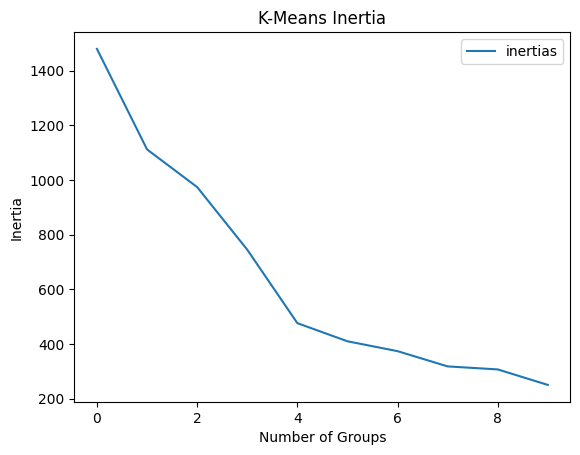

In [44]:
# Insert elbow plot 


## Solution file only
#
df_inertia = pd.DataFrame({'inertias': inertias})
ax = df_inertia.plot(kind='line', style=['-'])
ax.set(title="K-Means Inertia", xlabel="Number of Groups", ylabel="Inertia" )


### Now that you've chosen a number of groups, do the following. 

1. Run K-Means again for your chosen number of groups.
 - Make sure that your variable `kmeans` is for your desired number of groups

2. For each group, count the number of people that received a loan, and the number of people that did not receive a loan. You want to generate output like this

        Group:  0
          num yes  1
          num no  1

        Group:  1
          num yes  173
          num no  38

        Group:  2
          num yes  70
          num no  6

        Group:  3
          num yes  20
          num no  61


Hint: You can count the number of people in Group 0 (with label 0), who did not receive a loan with the below code snippet:
    
    number_no = 0
    for i in range( data.shape[0]):
        if kmeans.labels_[i] == 0:
            if data['Loan_Status'][i] == "N":
                number_no += 1


In [46]:
# Count the number of people here


## Solution File Only
#
numclusters = 4
kmeans = KMeans(n_clusters=numclusters)
kmeans.fit(data_numeric_scaled)

for label in range(numclusters):
    number_yes = 0
    number_no = 0
    for i in range( data.shape[0]):
        if kmeans.labels_[i] == label:
            if data['Loan_Status'][i] == "N":
                number_no += 1
            elif data['Loan_Status'][i] == "Y":
                number_yes += 1

    print("Group: ", label)
    print("  num yes ", number_yes, )
    print("  num no ", number_no)
    print("")



Group:  0
  num yes  177
  num no  41

Group:  1
  num yes  16
  num no  61

Group:  2
  num yes  70
  num no  3

Group:  3
  num yes  1
  num no  1



### Last, we want to see if there is any bias, or key pieces of information that can help predict if someone receives a loan.

For instance, you can see what the average number of dependents are for all people in Group 1 (label 1) with 

    print(data['Dependents'][ kmeans.labels_ == 1].mean() )

This can be useful in the following way.
- Say, that Group 1 corresponds to people that primarily did not receive a loan
- Then, say that the average number of dependents is high (or low) for everyone in Group 1
- Then, you could say that using K-Means to decide loans would bias against (or for) having many dependents

### Task: Examine this information for Dependents, Credit_History, and other categories.  Use it in your discussion below.





In [37]:
# Examine average (mean) information here


##
# Solution File only

# Shows bias that more dependents leads to being in a cluster with yes loans
print(data['Dependents'][ kmeans.labels_ == 1].mean() )

# Shows bias that positive credit history (1) leads to being in a cluster with yes loans
print(data['Credit_History'][ kmeans.labels_ == 1].mean() )

0.13829787234042554
1.0


### Discussion template

Quantitative Information Definition:  information represented numerically, i.e., represented with numbers. This can include  anything that can be measured or counted to that it has a numerical value.     
    - https://www.nnlm.gov/guides/data-glossary/quantitative-data
    - The data that you use K-Means with is quantative data

Quantitative Models: models that help us understand and interpret our numerical (quantitative) data.  K-Means is a quantitative model.

Have these 4 sections in your discussion

1. Communication/Representation of Quantitative Information
    - Give some sample loan information (say the data.head() information)
    - Discuss it as quantitative information

2. Application of Quantitative Models
    - Describe the model used (K-Means)
        - What is K-means.  How does K-Means work?  
        - What do we use K-Means for?  To quantitatively analyze data...
    - How would you use K-Means to help decide whether someone gets a loan?
    - Give your inertia plot
        - What does this tell you?

3. Conclusion -- Quantative Analysis
    - Discuss your output data above, 
    - Discuss your output on the number of people in each group that did and did not receive a loan
    - Discuss the average (mean) values for that you computed
    - Can you conclude that K-Means is biased against (or for) people with certain characteristics, like number of dependents or credit history or income?
    - What is still unexplained? 
    
4. Ethical Reasoning
    - Now that you've seen how an actual algorithm for grouping people works, and how an algorithm might make decisions about people, it's time to consider the ethics of that. 
    
    - What are your thoughts regarding the use of algorithms to group people (e.g., for targeted marketing, or for loans, or other purposes)?
    
    - Is this a good or bad idea, in your opinion?  Should there be certain conditions set? Give your own thoughts. 


Here are a few links to discussion on this issue from New Mexico, but there are many other articles on online on these topics. You're welcome to read / watch the below, or not.

  - https://www.santafe.edu/research/projects/algorithmic-justice
    
  - Video featuring UNM CS Professor Melanie Moses  https://www.youtube.com/watch?v=atVfp_zkkv4

  - https://www.sfreporter.com/news/2018/09/19/algorithms-and-ethics/
    


Discussion goes here

### Homework Submission Instructions

### The homework submission instructions are different this week. 

### Download your notebook as an ".ipynb" file, and upload the ipynb file as your assignment to Canvas.

### Do not upload a .py file

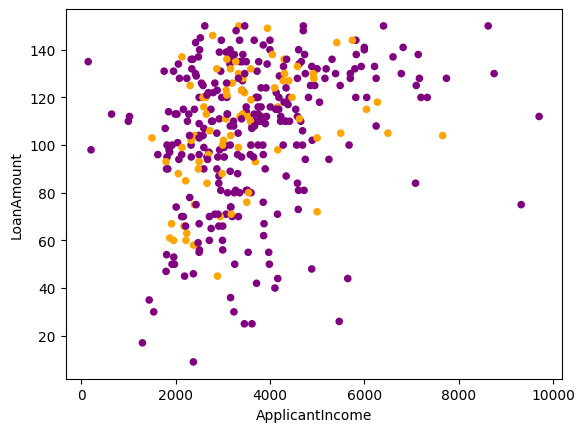

In [41]:
# I don't think this works too well with the current dataset, skip it
# Could be an interesting plot with other datasets

## Solution File Only
#


# 4 is a nice picture
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_numeric_scaled)

colors = [ 'orange', 'purple', 'olive', 'magenta', 'teal', 'red']
c = [colors[k] for k in kmeans.labels_]

#['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
#ax = data.plot.scatter(x='ApplicantIncome', y='Loan_Status', c=c)
#ax = data.plot.scatter(x='Credit_History', y='Loan_Status', c=c)

# inco
ax = data.plot.scatter(x='ApplicantIncome', y='LoanAmount', c=c)



In [ ]:
## Solution File Only
#

# choose subcolumns
#['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


data_numeric = data[['Dependents', 'Credit_History']]

# For all the categoies to work, need to scale, SEE BELOW cell
#data_numeric = data[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]


# Choose 6 cluster from plot
numclusters = 6

#kmeans = KMeans(n_clusters=numclusters, init='k-means++')
kmeans = KMeans(n_clusters=numclusters)
kmeans.fit(data_numeric)

for label in range(numclusters):
    number_yes = 0
    number_no = 0
    for i in range( data_numeric.shape[0]):
        if kmeans.labels_[i] == label:
            if data['Loan_Status'][i] == "N":
                number_no += 1
            elif data['Loan_Status'][i] == "Y":
                number_yes += 1

    print("Label: ", label)
    print("  num yes ", number_yes, )
    print("  num no ", number_no)
    print("")



In [19]:
## Solution File Only
#

# choose subcolumns
#['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


#data_numeric = data[['Dependents', 'Credit_History']]

# For all the categoies to work, need to scale
data_numeric = data[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)

# statistics of scaled data
pd.DataFrame(data_numeric_scaled).describe()


# Choose 6 cluster from plot
numclusters = 4

#kmeans = KMeans(n_clusters=numclusters, init='k-means++')
kmeans = KMeans(n_clusters=numclusters)
kmeans.fit(data_numeric_scaled)

for label in range(numclusters):
    number_yes = 0
    number_no = 0
    for i in range( data_numeric_scaled.shape[0]):
        if kmeans.labels_[i] == label:
            if data['Loan_Status'][i] == "N":
                number_no += 1
            elif data['Loan_Status'][i] == "Y":
                number_yes += 1

    print("Label: ", label)
    print("  num yes ", number_yes, )
    print("  num no ", number_no)
    print("")



Label:  0
  num yes  66
  num no  3

Label:  1
  num yes  137
  num no  29

Label:  2
  num yes  16
  num no  60

Label:  3
  num yes  45
  num no  14



In [24]:
# Shows bias that more dependents leads to being in a cluster with yes loans
print(data_numeric['Dependents'][ kmeans.labels_ == 0].mean() )

# Shows bias that positive credit history (1) leads to being in a cluster with yes loans
print(data_numeric['Credit_History'][ kmeans.labels_ == 0].mean() )

2.391304347826087
0.927536231884058
